# Boston 주택 가격 예측 모델
* 보스턴 시의 주택 가격에 대한 데이터 셋
* 주택의 여러 요건들과 가격 정보가 포함
* 회귀 분석에 자주 사용되는 대표적인 데이터셋  

* feature에 대한 설명
CRIM: 자치시별 1인당 범죄율  
ZN: 250,000 평방피트를 초과하는 거주 지역의 비율  
INDUS: 비소매상업지역이 점유하고 있는 토지의 비율  
CHAS: 찰스강에 대한 더미변수(강의 겨예에 위치한 경우는 1, 아니면 0)  
NOX: 10ppm 당 농축 이산화질소  
RM: 주택 1가구당 평균 방의 개수  
AGE: 1940년 이전에 건축된 소유주택의 비율  
DIS: 5개의 보스턴 직업센터까지의 접근성 지수  
RAD: 방사형 도로까지의 접근성 지수  
TAX: 10,000 달러당 재산세율  
PTRATIO: 자치시별 학생/교사 비율  
B: 100-(Bk-0.63)^2 (Bk는 자치시별 흑인의 비율)  
LSTAT: 모집단의 하위계층의 비율  
MEDV: 본인 소유의 주택가격(중앙값)(단위;$1,000)  

## 데이터 로드 및 전처리

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

print(len(train_data))
print(len(test_data))

404
102


In [3]:
# 표준화
mean = train_data.mean(axis=0)
train_data = train_data - mean

std = train_data.std(axis=0)
train_data = train_data /std

test_data = test_data - mean
test_data = test_data / std

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels,
                                                     test_size=0.2)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(323, 13)
(81, 13)
(323,)
(81,)


## 모델 구성 및 컴파일

In [14]:
model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1], )))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(1, activation='linear'))

model.compile(loss='mse',
             optimizer = 'Adam',
             metrics = ['mae'])

## 모델 학습

In [15]:
history = model.fit(x_train, y_train,
                   epochs=60,
                   batch_size=20,
                   validation_data=(x_val, y_val))

Epoch 1/60
17/17 [==============================] - 0s 9ms/step - loss: 509.8752 - mae: 20.6049 - val_loss: 520.9720 - val_mae: 20.9385
Epoch 2/60
17/17 [==============================] - 0s 4ms/step - loss: 443.3718 - mae: 18.9447 - val_loss: 457.4385 - val_mae: 19.3730
Epoch 3/60
17/17 [==============================] - 0s 3ms/step - loss: 388.9585 - mae: 17.4863 - val_loss: 407.1126 - val_mae: 18.0425
Epoch 4/60
17/17 [==============================] - 0s 4ms/step - loss: 346.3840 - mae: 16.2539 - val_loss: 367.1597 - val_mae: 16.9140
Epoch 5/60
17/17 [==============================] - 0s 3ms/step - loss: 312.8434 - mae: 15.2245 - val_loss: 335.0027 - val_mae: 15.9466
Epoch 6/60
17/17 [==============================] - 0s 3ms/step - loss: 285.3323 - mae: 14.3155 - val_loss: 307.5312 - val_mae: 15.0677
Epoch 7/60
17/17 [==============================] - 0s 3ms/step - loss: 262.1306 - mae: 13.5133 - val_loss: 284.1333 - val_mae: 14.2716
Epoch 8/60
17/17 [==============================

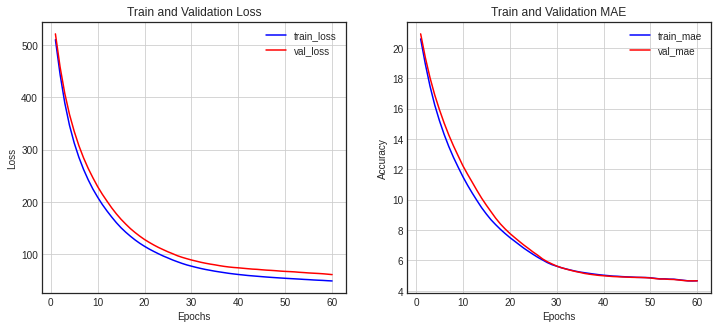

In [16]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측

In [17]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 48.4921 - mae: 4.7587


[48.49205017089844, 4.758650779724121]